# 1.) Install and Import Dependencies
📥 Install the required libraries and dependencies to get started.

In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#!pip install torch torchvision torchaudio matplotlib
#! pip install torch torchvision numpy opencv-python matplotlib tqdm pandas

In [2]:
#! git clone https://github.com/ultralytics/yolov5.git 
! cd yolov5
#! pip install -r requirements.txt

In [3]:
! cd yolov5 

In [3]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# 2.) Load Model
📦 Load the YOLOv5 model for object detection.

In [4]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-27 Python-3.11.11 torch-2.6.0 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [5]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

# 3.) Make Detections with images
🖼️ Use the model to make detections on static images.

In [7]:
img = 'cartraffic.jpg'

In [8]:
results = model(img)
results.print()

/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1066x1599 1 person, 32 cars, 4 trucks
Speed: 158.4ms pre-process, 58.6ms inference, 1.5ms NMS per image at shape (1, 3, 448, 640)


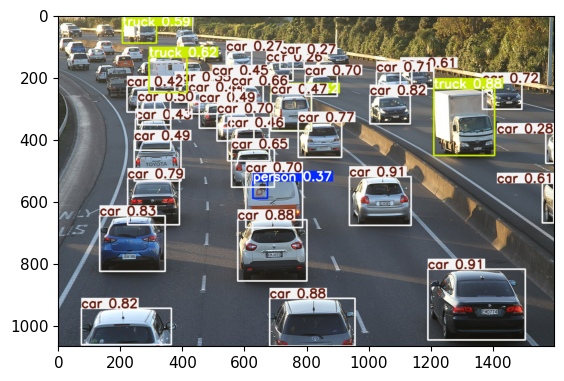

In [9]:
%matplotlib inline
#plt.imshow(np.squeeze(results.render()))
#plt.show()
if results is not None:
    plt.imshow(np.squeeze(results.render()))
    plt.show()
else:
    print("Error: YOLO model returned None. Check your input image and model.")

In [10]:
results.render()

[array([[[245, 218, 163],
         [249, 222, 167],
         [247, 222, 166],
         ...,
         [ 48,  55,  22],
         [ 71,  72,  30],
         [ 85,  83,  42]],
 
        [[240, 213, 158],
         [244, 217, 162],
         [245, 218, 163],
         ...,
         [ 54,  61,  30],
         [ 70,  71,  29],
         [ 87,  85,  44]],
 
        [[237, 208, 152],
         [237, 208, 152],
         [229, 199, 145],
         ...,
         [ 64,  71,  40],
         [ 69,  70,  30],
         [ 76,  74,  35]],
 
        ...,
 
        [[ 71,  79,  90],
         [ 59,  67,  78],
         [ 57,  65,  76],
         ...,
         [ 45,  53,  56],
         [ 46,  54,  57],
         [ 46,  54,  57]],
 
        [[ 57,  65,  76],
         [ 63,  71,  82],
         [ 73,  81,  92],
         ...,
         [ 50,  58,  61],
         [ 48,  56,  59],
         [ 46,  54,  57]],
 
        [[ 55,  63,  74],
         [ 64,  72,  83],
         [ 78,  86,  97],
         ...,
         [ 50,  58,  61],
  

# 4.) Real Time Detections
🎥 Perform real-time detections using a webcam.

In [4]:
# Import libraries for sound alerts
import platform
import threading
import time

# Variable to track last beep time to avoid constant beeping
last_beep_time = 0

# Function to generate beep sound based on platform in a non-blocking way
def beep():
    global last_beep_time
    current_time = time.time()
    # Only beep if more than 2 seconds have passed since last beep
    if current_time - last_beep_time < 2:
        return
    
    last_beep_time = current_time
    
    def play_sound():
        if platform.system() == 'Windows':
            import winsound
            winsound.Beep(1000, 500)  # Frequency: 1000Hz, Duration: 500ms
        else:  # For macOS and Linux
            import os
            os.system('afplay /System/Library/Sounds/Ping.aiff &' if platform.system() == 'Darwin' else 'play -nq -t alsa synth 0.5 sine 1000 &')
    
    # Start the sound in a separate thread so it doesn't block the video
    sound_thread = threading.Thread(target=play_sound)
    sound_thread.daemon = True  # Set as daemon so it doesn't prevent program exit
    sound_thread.start()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    # Check if 'drowsy' is detected
    detected_objects = results.pandas().xyxy[0].to_dict(orient='records')
    drowsy_detected = False
    
    for obj in detected_objects:
        if 'name' in obj and obj['name'] == 'drowsy':
            drowsy_detected = True
            break
    
    # Play beep if drowsy is detected
    if drowsy_detected:
        beep()
        # Add visual alert by drawing red rectangle around frame
        cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), (0, 0, 255), 10)
    
    cv2.imshow('Drowsiness_DET', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2025-02-27 10:48:24.910 Python[4096:49582] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_mast

AttributeError: 'NoneType' object has no attribute 'shape'

# 5.) Train the Drowsiness Detection Model
🏋️‍♂️ Train the model to detect drowsiness using labeled datasets.

In [5]:
import uuid # Unique Identifier
import os   
import time

In [6]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 20

In [8]:
cap = cv2.VideoCapture(0)

# Loop through labels
for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(3)  # Reduced delay for a better experience

    # Loop through image range
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image number {img_num}')

        # Read frame
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture image!")
            continue

        # Generate a unique filename
        imgname = os.path.join(IMAGES_PATH, f"{label}.{uuid.uuid4()}.jpg")

        # Save image
        success = cv2.imwrite(imgname, frame)
        if not success:
            print(f"Failed to save image: {imgname}")

        # Show frame
        cv2.imshow('Image Collection', frame)

        # 2-second delay
        if cv2.waitKey(2000) & 0xFF == ord('q'):
            break

# Release resources
cap.release()
cv2.destroyAllWindows()

2025-03-18 10:50:53.861 python[2360:22182] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-18 10:50:53.861 python[2360:22182] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [7]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data/images/awake.0aa5e64e-03bc-11f0-bfa2-8a45f6e25a18.jpg


In [13]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)   

data/images/awake.3df995ba-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df997f4-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df998bc-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df9995c-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df999f2-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99aa6-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99b3c-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99bf0-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99c90-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99d26-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99dc6-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99e52-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99ede-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df99f6a-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df9a000-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df9a082-03bf-11f0-bb0c-8a45f6e25a18.jpg
data/images/awake.3df9a118-03bf-11f0-bb0c-8a45f6e25a18.j

In [27]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2097 (delta 0), reused 0 (delta 0), pack-reused 2093 (from 2)
Receiving objects: 100% (2097/2097), 237.14 MiB | 1.93 MiB/s, done.
Resolving deltas: 100% (1245/1245), done.


In [7]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [8]:
!python3 /Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/labelImg/labelImg.py

2025-03-19 17:06:53.656 python3[2206:20553] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-19 17:06:53.656 python3[2206:20553] +[IMKInputSession subclass]: chose IMKInputSession_Modern
Image:/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/data/images/awake.0a6fa2b5-e063-4c35-8222-5f61b61b7da5.jpg -> Annotation:/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/data/labels/awake.0a6fa2b5-e063-4c35-8222-5f61b61b7da5.txt
[('awake', [(568, 163), (1160, 163), (1160, 968), (568, 968)], None, None, False)]
Image:/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/data/images/awake.6b48386a-a327-4dbb-a3fe-8606f8ac0375.jpg -> Annotation:/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/data/labels/awake.6b48386a-a327-4dbb-a3fe-8606f8ac0375.txt
Image:/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/data/images/awake.8d37f1f8-acb0-4e22-a41b-c2ee123eac45.jpg -> Annotation:/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/data/labels/awake.8d37f1f8-a

In [1]:
!cd yolov5 && python3 train.py --img 320 --batch 16 --epochs 100 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: ⚠️ YOLOv5 is out of date by 13 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-398-g5cdad892 Python-3.11.11 torch-2.6.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, b

# 6.) Load Custom Model
📂 Load your custom-trained YOLOv5 model.

In [6]:
#model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/yolov5/runs/train/exp4/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/gauravsmac/.cache/torch/hub/master.zip
YOLOv5 🚀 2025-4-20 Python-3.11.11 torch-2.6.0 CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [7]:
img = '/Users/gauravsmac/Desktop/YOLO-Drowsiness-Detection-main/data/images/awake.0a6fa2b5-e063-4c35-8222-5f61b61b7da5.jpg'

In [9]:
results = model(img)
results.print()

/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1080x1920 1 awake
Speed: 28.3ms pre-process, 54.7ms inference, 0.4ms NMS per image at shape (1, 3, 384, 640)


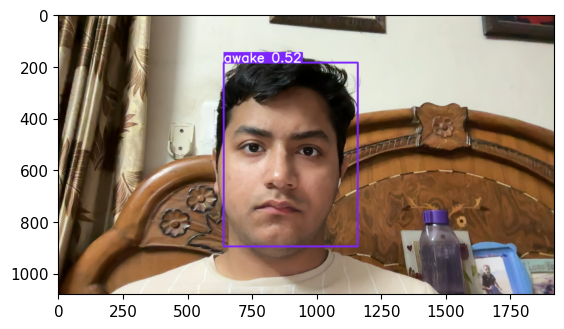

In [10]:
%matplotlib inline
#plt.imshow(np.squeeze(results.render()))
#plt.show()
if results is not None:
    plt.imshow(np.squeeze(results.render()))
    plt.show()
else:
    print("Error: YOLO model returned None. Check your input image and model.")

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    # Check if 'drowsy' is detected
    detected_objects = results.pandas().xyxy[0].to_dict(orient='records')
    drowsy_detected = False
    
    for obj in detected_objects:
        if 'name' in obj and obj['name'] == 'drowsy':
            drowsy_detected = True
            break
    
    # Play beep if drowsy is detected
    if drowsy_detected:
        beep()
        # Add visual alert by drawing red rectangle around frame
        cv2.rectangle(frame, (0, 0), (frame.shape[1], frame.shape[0]), (0, 0, 255), 10)
    
    cv2.imshow('Drowsiness_DET', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

2025-04-20 23:44:41.221 python[3638:62279] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
/Users/gauravsmac/.cache/torch/hub/ultralytics_yolov5_mast